In [16]:
import numpy as np
from numpy import array
import math

import pandas as pd 
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
import tensorflow.keras.layers as KL

from matplotlib import pyplot

# LOAD DATA (VERSION 3)

In [2]:
input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input3.csv', index_col = 0)
input_data.index.name = 'Timestamp (seconds)'
output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output3.csv', index_col = 0)
output_data.index.name = 'Timestamp (seconds)'

# ENCODING Y

In [3]:
split_columns = 1

In [4]:
#output_data2 = np.array(output_data)
#print(output_data2.shape)

#Y = list()

#for i in range((int(split_columns/2)),output_data2.shape[0], split_columns):
#    Y.append(output_data2[i])

#Y = array(Y)
#print(Y.shape)

#DECODING Y
# integer encode direction
#encoder = LabelEncoder()
#Y = encoder.fit_transform(Y)
#print(Y.shape)

In [5]:
#Modifying the output_data to, putting to Y in array
#1 0 0 for normal
#0 1 0 for drowsy
#0 0 1 for aggressive

output_data = np.array(output_data)

Y = list()

for i in range(int(output_data.shape[0]/split_columns)):
    condition = output_data[(i*split_columns)]    
    behavior = []
    if(condition=='DROWSY'):
        behavior = [0,1,0]
    elif(condition=='AGGRESSIVE'):
        behavior = [0,0,1]
    else:
        behavior = [1,0,0]
    
    Y.append(behavior)

Y = array(Y)
print(Y.shape)

(30929, 3)


In [6]:
#min max scaler
X = input_data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(30929, 28)
(30929, 3)


In [7]:
#USE THIS IF MINMAX SCALER IS NOT USED
#X = np.array(X)
#X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
#print(X.shape)

# RESHAPING X

In [8]:
X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1],1))
print(X.shape)

(30929, 1, 28, 1)


In [9]:
#SPLITTING TRAINING AND TEST DATA METHOD 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [10]:
#SPLITTING TRAINING AND TEST DATA METHOD 2
#X_train = X[:(int(X.shape[0] * 0.8)),:,:]
#X_test = X[(int(X.shape[0] * 0.8)):,:,:]
print(X_train.shape)
print(X_test.shape)
#Y_train = Y[:(int(Y.shape[0] * 0.8)),:]
#Y_test = Y[(int(Y.shape[0] * 0.8)):,:]
print(Y_train.shape)
print(Y_test.shape)

(24743, 1, 28, 1)
(6186, 1, 28, 1)
(24743, 3)
(6186, 3)


In [11]:
#MAKING SURE DATA TYPE ARE CORRECT
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')

# BUILD CNN MODEL

In [12]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]) 
model.add(Conv2D(25, kernel_size=(1,3), strides=(1,1), padding='valid', activation='relu', input_shape = input_shape))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
#adding dropout layer to reduce overfitting
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(3, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 26, 25)         100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 26, 25)         0         
_________________________________________________________________
flatten (Flatten)            (None, 650)               0         
_________________________________________________________________
dropout (Dropout)            (None, 650)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               65100     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 65,503
Trainable params: 65,503
Non-trainable params: 0
____________________________________________________

In [14]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
194/194 [==============================] - 1s 6ms/step - loss: 0.9879 - accuracy: 0.4711 - val_loss: 0.9068 - val_accuracy: 0.5286
Epoch 2/100
194/194 [==============================] - 1s 5ms/step - loss: 0.8743 - accuracy: 0.5557 - val_loss: 0.8045 - val_accuracy: 0.6106
Epoch 3/100
194/194 [==============================] - 1s 5ms/step - loss: 0.7984 - accuracy: 0.6099 - val_loss: 0.7230 - val_accuracy: 0.6781
Epoch 4/100
194/194 [==============================] - 1s 5ms/step - loss: 0.7485 - accuracy: 0.6399 - val_loss: 0.6701 - val_accuracy: 0.7169
Epoch 5/100
194/194 [==============================] - 1s 4ms/step - loss: 0.6953 - accuracy: 0.6805 - val_loss: 0.6270 - val_accuracy: 0.7425
Epoch 6/100
194/194 [==============================] - 1s 5ms/step - loss: 0.6650 - accuracy: 0.7023 - val_loss: 0.5926 - val_accuracy: 0.7650
Epoch 7/100
194/194 [==============================] - 1s 5ms/step - loss: 0.6389 - accuracy: 0.7186 - val_loss: 0.5797 - val_accuracy: 0.7659

Epoch 58/100
194/194 [==============================] - 1s 7ms/step - loss: 0.3244 - accuracy: 0.8674 - val_loss: 0.2613 - val_accuracy: 0.9037
Epoch 59/100
194/194 [==============================] - 1s 7ms/step - loss: 0.3242 - accuracy: 0.8661 - val_loss: 0.2628 - val_accuracy: 0.8959
Epoch 60/100
194/194 [==============================] - 1s 7ms/step - loss: 0.3213 - accuracy: 0.8673 - val_loss: 0.2494 - val_accuracy: 0.9032
Epoch 61/100
194/194 [==============================] - 1s 7ms/step - loss: 0.3133 - accuracy: 0.8735 - val_loss: 0.2582 - val_accuracy: 0.9007
Epoch 62/100
194/194 [==============================] - 1s 7ms/step - loss: 0.3138 - accuracy: 0.8709 - val_loss: 0.2485 - val_accuracy: 0.9030
Epoch 63/100
194/194 [==============================] - 1s 7ms/step - loss: 0.3168 - accuracy: 0.8712 - val_loss: 0.2613 - val_accuracy: 0.8982
Epoch 64/100
194/194 [==============================] - 1s 7ms/step - loss: 0.3139 - accuracy: 0.8723 - val_loss: 0.2438 - val_accuracy:

In [15]:
check2 = X_test.reshape((X_test.shape[0], X.shape[1], X.shape[2],1))
predictions = model.predict(check2)
print(predictions.shape)
for i in range(predictions.shape[0]):
    if (predictions[i][0] >= predictions[i][1] and predictions[i][0] >= predictions[i][2]):
        predictions[i] = [1, 0, 0]
    elif (predictions[i][1] >= predictions[i][0] and predictions[i][1] >= predictions[i][2]):
        predictions[i] = [0, 1, 0]
    else:
        predictions[i] = [0, 0, 1]


        
count = 0
for i in range(predictions.shape[0]):
    if(predictions[i][0] == (Y_test[i][0]) and predictions[i][1] == (Y_test[i][1]) and predictions[i][2] == (Y_test[i][2]) ):
        count = count + 1
print('After the predictions has been estimated, the accuracy is ' + str((count/predictions.shape[0])*100) + ' %')

(6186, 3)
After the predictions has been estimated, the accuracy is 92.69317814419658 %


# K-FOLD

In [17]:
kf = KFold(n_splits = 5)
list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
   
    # building a linear stack of layers with the sequential model
    model = Sequential()
    # convolutional layer
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]) 
    model.add(Conv2D(25, kernel_size=(1,3), strides=(1,1), padding='valid', activation='relu', input_shape = input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    # flatten output of conv
    model.add(Flatten())
    #adding dropout layer to reduce overfitting
    model.add(Dropout(0.2))
    # hidden layer
    model.add(Dense(100, activation='relu'))
    # output layer
    model.add(Dense(3, activation='softmax'))
    
    # compiling the sequential model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    # training the model for 10 epochs
    model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test))
    
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

Epoch 1/100
194/194 [==============================] - 2s 8ms/step - loss: 1.0822 - accuracy: 0.4174 - val_loss: 1.0744 - val_accuracy: 0.4298
Epoch 2/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0803 - accuracy: 0.4200 - val_loss: 1.0759 - val_accuracy: 0.4298
Epoch 3/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0789 - accuracy: 0.4215 - val_loss: 1.0735 - val_accuracy: 0.4298
Epoch 4/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0791 - accuracy: 0.4215 - val_loss: 1.0740 - val_accuracy: 0.4298
Epoch 5/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0787 - accuracy: 0.4215 - val_loss: 1.0750 - val_accuracy: 0.4298
Epoch 6/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0786 - accuracy: 0.4215 - val_loss: 1.0745 - val_accuracy: 0.4298
Epoch 7/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0787 - accuracy: 0.4215 - val_loss: 1.0749 - val_accuracy: 0.4298

Epoch 58/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0754 - accuracy: 0.4226 - val_loss: 1.0750 - val_accuracy: 0.4298
Epoch 59/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0752 - accuracy: 0.4232 - val_loss: 1.0751 - val_accuracy: 0.4300
Epoch 60/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0749 - accuracy: 0.4242 - val_loss: 1.0749 - val_accuracy: 0.4289
Epoch 61/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0750 - accuracy: 0.4225 - val_loss: 1.0752 - val_accuracy: 0.4295
Epoch 62/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0743 - accuracy: 0.4230 - val_loss: 1.0756 - val_accuracy: 0.4284
Epoch 63/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0744 - accuracy: 0.4231 - val_loss: 1.0760 - val_accuracy: 0.4295
Epoch 64/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0747 - accuracy: 0.4236 - val_loss: 1.0753 - val_accuracy:

Epoch 15/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0779 - accuracy: 0.4215 - val_loss: 1.0742 - val_accuracy: 0.4298
Epoch 16/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0781 - accuracy: 0.4215 - val_loss: 1.0741 - val_accuracy: 0.4298
Epoch 17/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0778 - accuracy: 0.4215 - val_loss: 1.0746 - val_accuracy: 0.4298
Epoch 18/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0779 - accuracy: 0.4215 - val_loss: 1.0743 - val_accuracy: 0.4298
Epoch 19/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0781 - accuracy: 0.4215 - val_loss: 1.0741 - val_accuracy: 0.4298
Epoch 20/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0781 - accuracy: 0.4215 - val_loss: 1.0747 - val_accuracy: 0.4298
Epoch 21/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0779 - accuracy: 0.4215 - val_loss: 1.0741 - val_accuracy:

Epoch 72/100
194/194 [==============================] - 2s 8ms/step - loss: 1.0731 - accuracy: 0.4250 - val_loss: 1.0780 - val_accuracy: 0.4266
Epoch 73/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0728 - accuracy: 0.4240 - val_loss: 1.0772 - val_accuracy: 0.4285
Epoch 74/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0729 - accuracy: 0.4249 - val_loss: 1.0772 - val_accuracy: 0.4271
Epoch 75/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0723 - accuracy: 0.4243 - val_loss: 1.0760 - val_accuracy: 0.4294
Epoch 76/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0719 - accuracy: 0.4264 - val_loss: 1.0781 - val_accuracy: 0.4261
Epoch 77/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0725 - accuracy: 0.4254 - val_loss: 1.0773 - val_accuracy: 0.4289
Epoch 78/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0707 - accuracy: 0.4263 - val_loss: 1.0808 - val_accuracy:

Epoch 29/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0774 - accuracy: 0.4221 - val_loss: 1.0742 - val_accuracy: 0.4302
Epoch 30/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0776 - accuracy: 0.4223 - val_loss: 1.0738 - val_accuracy: 0.4300
Epoch 31/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0774 - accuracy: 0.4219 - val_loss: 1.0743 - val_accuracy: 0.4302
Epoch 32/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0773 - accuracy: 0.4220 - val_loss: 1.0738 - val_accuracy: 0.4300
Epoch 33/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0773 - accuracy: 0.4217 - val_loss: 1.0738 - val_accuracy: 0.4302
Epoch 34/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0773 - accuracy: 0.4213 - val_loss: 1.0736 - val_accuracy: 0.4300
Epoch 35/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0771 - accuracy: 0.4225 - val_loss: 1.0735 - val_accuracy:

Epoch 86/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0705 - accuracy: 0.4265 - val_loss: 1.0761 - val_accuracy: 0.4264
Epoch 87/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0707 - accuracy: 0.4285 - val_loss: 1.0769 - val_accuracy: 0.4222
Epoch 88/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0701 - accuracy: 0.4273 - val_loss: 1.0768 - val_accuracy: 0.4264
Epoch 89/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0701 - accuracy: 0.4281 - val_loss: 1.0784 - val_accuracy: 0.4231
Epoch 90/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0700 - accuracy: 0.4279 - val_loss: 1.0780 - val_accuracy: 0.4239
Epoch 91/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0699 - accuracy: 0.4277 - val_loss: 1.0786 - val_accuracy: 0.4235
Epoch 92/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0698 - accuracy: 0.4258 - val_loss: 1.0778 - val_accuracy:

Epoch 43/100
194/194 [==============================] - 1s 7ms/step - loss: 1.0761 - accuracy: 0.4222 - val_loss: 1.0763 - val_accuracy: 0.4305
Epoch 44/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0761 - accuracy: 0.4217 - val_loss: 1.0796 - val_accuracy: 0.4313
Epoch 45/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0758 - accuracy: 0.4238 - val_loss: 1.0755 - val_accuracy: 0.4305
Epoch 46/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0758 - accuracy: 0.4223 - val_loss: 1.0764 - val_accuracy: 0.4316
Epoch 47/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0759 - accuracy: 0.4224 - val_loss: 1.0775 - val_accuracy: 0.4321
Epoch 48/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0753 - accuracy: 0.4234 - val_loss: 1.0770 - val_accuracy: 0.4315
Epoch 49/100
194/194 [==============================] - 1s 6ms/step - loss: 1.0758 - accuracy: 0.4228 - val_loss: 1.0772 - val_accuracy:

194/194 [==============================] - 2s 8ms/step - loss: 1.0674 - accuracy: 0.4290 - val_loss: 1.0945 - val_accuracy: 0.4234
Epoch 100/100
194/194 [==============================] - 1s 8ms/step - loss: 1.0667 - accuracy: 0.4285 - val_loss: 1.0942 - val_accuracy: 0.4271


ValueError: Data cardinality is ambiguous:
  x sizes: 24744
  y sizes: 24743
Please provide data which shares the same first dimension.

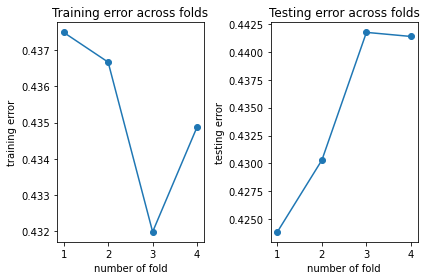

In [24]:
from matplotlib import pyplot as plt
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits()), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits()), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()